In [1]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from config import geoapify_key

In [5]:
colnames=['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']
df = pd.read_csv('/Users/ali/1st-group-project/Resources/yelp_locations_df_v01.csv', names=colnames)

df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [6]:
target_city = "Philadelphia, Pennsylvania"

target_url = f"https://api.geoapify.com/v2/places?categories=catering&filter=place:51d80144b194c852c0590b89d6a9f9004440f00101f90176de020000000000c0020692030c5068696c6164656c70686961&limit=20&apiKey={geoapify_key}"


In [7]:
df.shape

(14569, 14)

In [8]:
target_url

'https://api.geoapify.com/v2/places?categories=catering&filter=place:51d80144b194c852c0590b89d6a9f9004440f00101f90176de020000000000c0020692030c5068696c6164656c70686961&limit=20&apiKey=eca355bfb1ab429485ba24bbe352036e'

In [9]:
geo_data = requests.get(target_url).json()

print(geo_data)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'name': 'Valley Green Inn', 'country': 'United States', 'country_code': 'us', 'state': 'Pennsylvania', 'county': 'Philadelphia County', 'city': 'Philadelphia', 'postcode': '19128', 'street': 'Valley Green Road', 'lon': -75.21821459327312, 'lat': 40.05408665, 'state_code': 'PA', 'formatted': 'Valley Green Inn, Valley Green Road, Philadelphia, PA 19128, United States of America', 'address_line1': 'Valley Green Inn', 'address_line2': 'Valley Green Road, Philadelphia, PA 19128, United States of America', 'categories': ['building', 'building.catering', 'building.historic', 'catering', 'catering.restaurant', 'catering.restaurant.american', 'tourism', 'tourism.sights', 'vegan', 'vegetarian'], 'details': ['details', 'details.catering', 'details.contact', 'details.wiki_and_media'], 'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database Licence', 'url': 'h

In [10]:
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    -75.21820845512848,
                    40.054094423569076
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Valley Green Inn",
                "address_line2": "Valley Green Road, Philadelphia, PA 19128, United States of America",
                "categories": [
                    "building",
                    "building.catering",
                    "building.historic",
                    "catering",
                    "catering.restaurant",
                    "catering.restaurant.american",
                    "tourism",
                    "tourism.sights",
                    "vegan",
                    "vegetarian"
                ],
                "city": "Philadelphia",
                "country": "United States",
                "country_code": "us",
                "county": "Philadelp

In [11]:
lat = geo_data["features"][0]["properties"]
lon = geo_data["features"][0]["properties"]

print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, lat, lon))


    City: Philadelphia, Pennsylvania
    Latitude: {'name': 'Valley Green Inn', 'country': 'United States', 'country_code': 'us', 'state': 'Pennsylvania', 'county': 'Philadelphia County', 'city': 'Philadelphia', 'postcode': '19128', 'street': 'Valley Green Road', 'lon': -75.21821459327312, 'lat': 40.05408665, 'state_code': 'PA', 'formatted': 'Valley Green Inn, Valley Green Road, Philadelphia, PA 19128, United States of America', 'address_line1': 'Valley Green Inn', 'address_line2': 'Valley Green Road, Philadelphia, PA 19128, United States of America', 'categories': ['building', 'building.catering', 'building.historic', 'catering', 'catering.restaurant', 'catering.restaurant.american', 'tourism', 'tourism.sights', 'vegan', 'vegetarian'], 'details': ['details', 'details.catering', 'details.contact', 'details.wiki_and_media'], 'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database Licence', 'url': 'https://www.openstreetmap.

In [12]:

params = {
    "text": target_city,
    "geoapify_key": geoapify_key
}


In [13]:
response = requests.get(target_url, params=params).json()

print(json.dumps(response, indent=4, sort_keys=True))


{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    -75.21820845512848,
                    40.054094423569076
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Valley Green Inn",
                "address_line2": "Valley Green Road, Philadelphia, PA 19128, United States of America",
                "categories": [
                    "building",
                    "building.catering",
                    "building.historic",
                    "catering",
                    "catering.restaurant",
                    "catering.restaurant.american",
                    "tourism",
                    "tourism.sights",
                    "vegan",
                    "vegetarian"
                ],
                "city": "Philadelphia",
                "country": "United States",
                "country_code": "us",
                "county": "Philadelp

In [14]:
counter = 0

for place in response["features"]:
    print(f"Restaurant {counter+1}:")
    print(place["properties"]["name"])
    print(place["properties"]["address_line2"])
    print("*"*20)
    counter = counter + 1
    if counter == 5:
        break

Restaurant 1:
Valley Green Inn
Valley Green Road, Philadelphia, PA 19128, United States of America
********************
Restaurant 2:
Geno's Steaks
1219 South 9th Street, Philadelphia, PA 19147, United States of America
********************
Restaurant 3:
McDonald's
3935 Walnut Street, Philadelphia, PA 19104, United States of America
********************
Restaurant 4:
Moshulu
South Christopher Columbus Boulevard, Philadelphia, PA 19106, United States of America
********************
Restaurant 5:
Green Line Cafe
4239 Baltimore Avenue, Philadelphia, PA 19104, United States of America
********************


In [15]:
print(response["features"][0]["properties"]["name"])
print(response["features"][0]["properties"]["address_line2"])


Valley Green Inn
Valley Green Road, Philadelphia, PA 19128, United States of America


In [16]:
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{target_city}: {lat}, {lon}")

Philadelphia, Pennsylvania: 40.05408665, -75.21821459327312


In [17]:
# Set the geographical coordinates
latitude = 40.05408665
longitude = -75.21821459327312

# Set the parameters for the type of search
limit = 20
radius = 1000
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"

# set up a parameters dictionary
params = {
    "filter":filters,
    "limit":limit,
    "bias":bias,
    "geoapify_key":geoapify_key    
}

# Set base URL
target_url = "https://api.geoapify.com/v2/places"

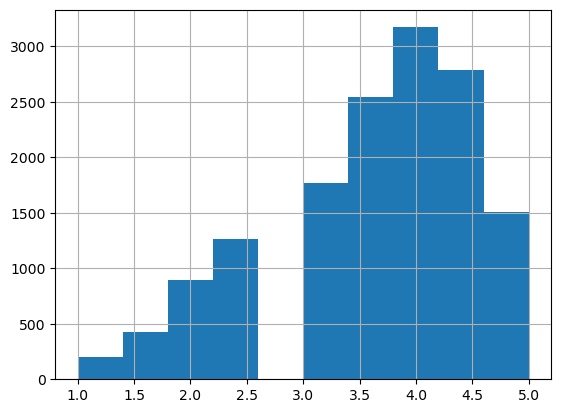

In [18]:
df['stars'].hist();


In [19]:
df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code     float64
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [20]:
#encoding attributes and sub-attributes currently in 'attributes' column
df['attributes'].head()

0    {'RestaurantsDelivery': 'False', 'OutdoorSeati...
1    {'RestaurantsReservations': 'True', 'Restauran...
2    {'NoiseLevel': "u'quiet'", 'GoodForMeal': "{'d...
3    {'Smoking': "u'no'", 'NoiseLevel': "u'average'...
4    {'RestaurantsReservations': 'False', 'Caters':...
Name: attributes, dtype: object

/var/folders/w9/061x6j5j5v58my1zbyjcx02c0000gn/T/ipykernel_1190/803539953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stars'], kde=False)


<Axes: xlabel='stars'>

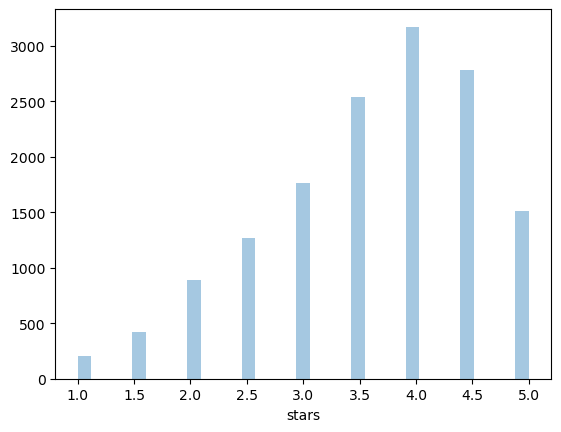

In [21]:
sns.distplot(df['stars'], kde=False)

In [42]:
df.iloc[:, 14: 14569].sum().sort_values(ascending=False).head(10)


Series([], dtype: float64)